In [1]:
pwd

'/content'

In [76]:
import os
import json
import pandas as pd
from datetime import date
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/content/meebit_hashtag.csv")
df.head()

,Unnamed: 0,Datetime,Tweet Id,Text
0,0,2021-11-30 22:26:15+00:00,1.465809e+18,2 hours 30mins left on the auction. Current bi...
1,1,2021-11-30 19:23:48+00:00,1.465764e+18,Meebit just listed under floor (-0.61 %)\n\n💰:...
2,2,2021-11-30 17:48:11+00:00,1.465739e+18,#vizzioart #vizzioartcreatorslab #homospacien#...
3,3,2021-11-30 13:05:47+00:00,1.465668e+18,Meebit just listed under floor (-1.56 %)\n\n💰:...
4,4,2021-11-30 12:49:14+00:00,1.465664e+18,#vizzioart #vizzioartcreatorslab #homospacien ...


In [4]:
df= df[["Datetime","Text"]]

In [5]:
df['Date'] = pd.to_datetime(df['Datetime']).dt.date
df.drop("Datetime",axis=1,inplace=True)
df= df[["Date","Text"]]
df.head()

,Date,Text
0,2021-11-30,2 hours 30mins left on the auction. Current bi...
1,2021-11-30,Meebit just listed under floor (-0.61 %)\n\n💰:...
2,2021-11-30,#vizzioart #vizzioartcreatorslab #homospacien#...
3,2021-11-30,Meebit just listed under floor (-1.56 %)\n\n💰:...
4,2021-11-30,#vizzioart #vizzioartcreatorslab #homospacien ...


In [6]:
import itertools
import re
import string 

In [7]:
#create function to clean the tweets 
def cleantwt(twt):
  twt = re.sub('#meebits' , 'meebits',twt) 
  twt = re.sub('#Meebits' , 'Meebits',twt)
  twt = re.sub('#[A-Za-z0-9]+', '',twt)
  twt = re.sub('\\n','',twt) 
  twt = re.sub('https?:\/\/\S+','',twt) # removes any hyperlinks
  return twt

In [8]:
df['Text']=df['Text'].apply(str)

In [9]:
#clean tweet
df['tweet'] = df['Text'].apply(cleantwt)

In [10]:
df.drop("Text",axis=1,inplace=True)

In [11]:
!pip install textblob

In [12]:
#here we are making a new column 'polarity' by applying textblob function on the processed tweets which are in english language
from textblob import TextBlob
df['polarity'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment[0])

In [13]:
new_df = df.groupby('Date')['polarity'].mean()

In [14]:
new_df = pd.DataFrame(new_df,columns = ['polarity'])
new_df.head()

,polarity
Date,
2021-05-03,0.144444
2021-05-04,0.132234
2021-05-05,0.096869
2021-05-06,0.088532
2021-05-07,0.140557


**Graphs**

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

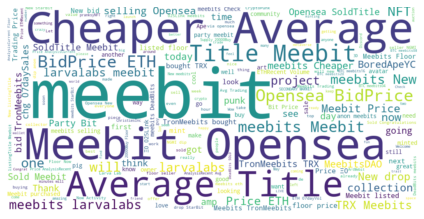

In [17]:
from wordcloud import WordCloud,ImageColorGenerator
text = " ".join(tweet for tweet in df['tweet'].astype(str))
wordcloud = WordCloud(
    background_color = 'white',
    width = 1000,
    height = 500).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.rcParams['figure.figsize'] = [20, 20]
plt.tight_layout()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c1f80b0d0>],
      dtype=object)

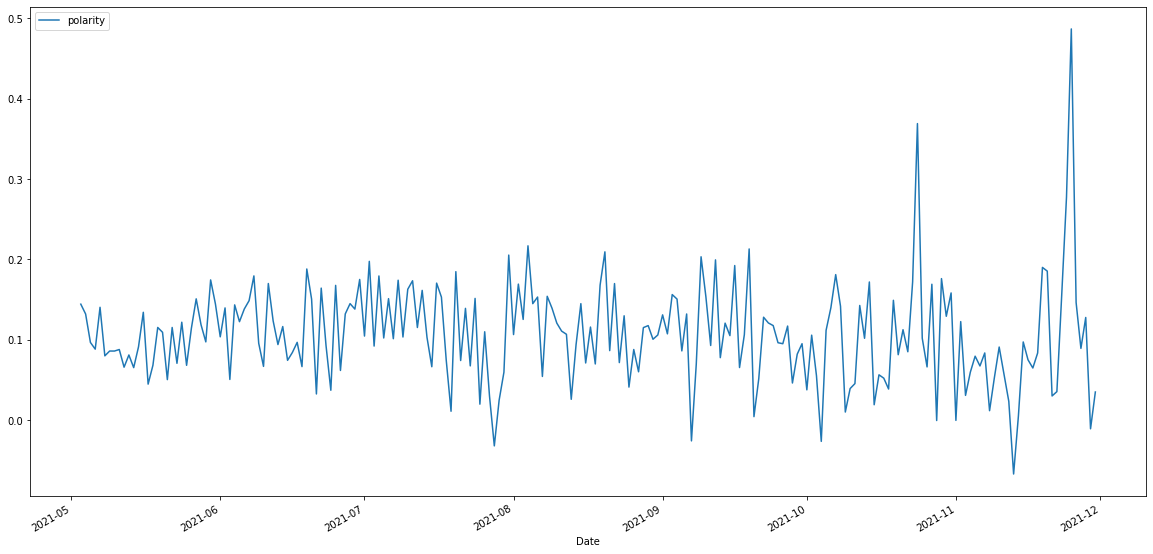

In [19]:
df.groupby('Date')['polarity'].mean().plot(figsize=(20,10),subplots=True,legend=True)

In [20]:
new_df.reset_index(inplace=True)

In [21]:
new_df.head()

,Date,polarity
0,2021-05-03,0.144444
1,2021-05-04,0.132234
2,2021-05-05,0.096869
3,2021-05-06,0.088532
4,2021-05-07,0.140557


In [22]:
df1=pd.read_csv("/content/meebit_pricedata.csv")
df1.head()

,Date,avg_price,no_sales
0,5/2/2021,5.24,707
1,5/3/2021,6.16,937
2,5/4/2021,4.76,420
3,5/5/2021,4.45,278
4,5/6/2021,3.24,274


In [23]:
df1['Date'] = pd.to_datetime(df1.Date)

In [24]:
df1.head()

,Date,avg_price,no_sales
0,2021-05-02,5.24,707
1,2021-05-03,6.16,937
2,2021-05-04,4.76,420
3,2021-05-05,4.45,278
4,2021-05-06,3.24,274


In [25]:
new_df["Date"]= pd.to_datetime(new_df["Date"])

In [26]:
final_df= pd.merge(new_df,df1, on='Date',how='inner')
final_df.head()

,Date,polarity,avg_price,no_sales
0,2021-05-03,0.144444,6.16,937
1,2021-05-04,0.132234,4.76,420
2,2021-05-05,0.096869,4.45,278
3,2021-05-06,0.088532,3.24,274
4,2021-05-07,0.140557,6.80,176


In [27]:
final_df.rename(columns={'no_sales': 'Total_sales'}, inplace=True)

In [133]:
a=final_df

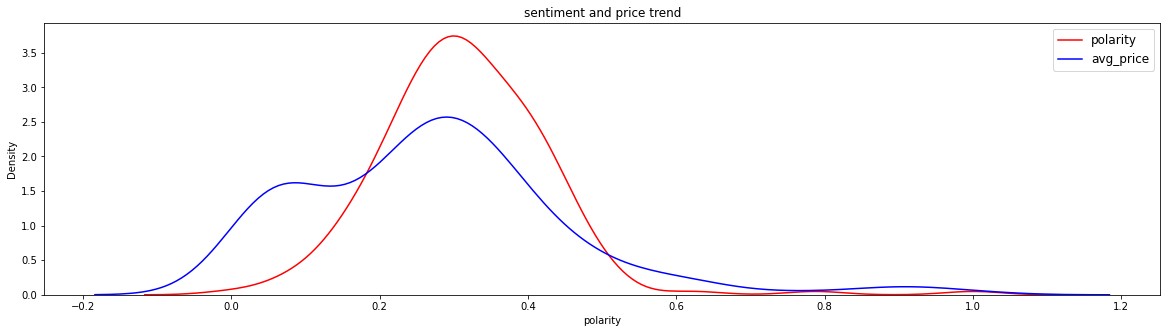

In [134]:

from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
a[['polarity','avg_price']]= scaling.fit_transform(final_df[['polarity','avg_price']])


fig, (ax1) = plt.subplots(ncols = 1, figsize =(20, 5)) 
ax1.set_title('polarity and avg_price') 
  
sns.kdeplot(a['polarity'], ax = ax1, color ='r') 
sns.kdeplot(a['avg_price'], ax = ax1, color ='b') 
ax1.set_title('sentiment and price trend') 
plt.legend(labels=["polarity","avg_price"], 
           fontsize = 'large', title_fontsize = "10")

In [135]:
a.reset_index(inplace=True)

In [136]:
# converting dates/time columns into a datetime object
a["Period"] = pd.to_datetime(a["Date"])# set the new datetime column as the index
a = a.set_index("Period")# create new columns from datetime index
a["year"] = a.index.year
a["month"] = a.index.month# new dataframe

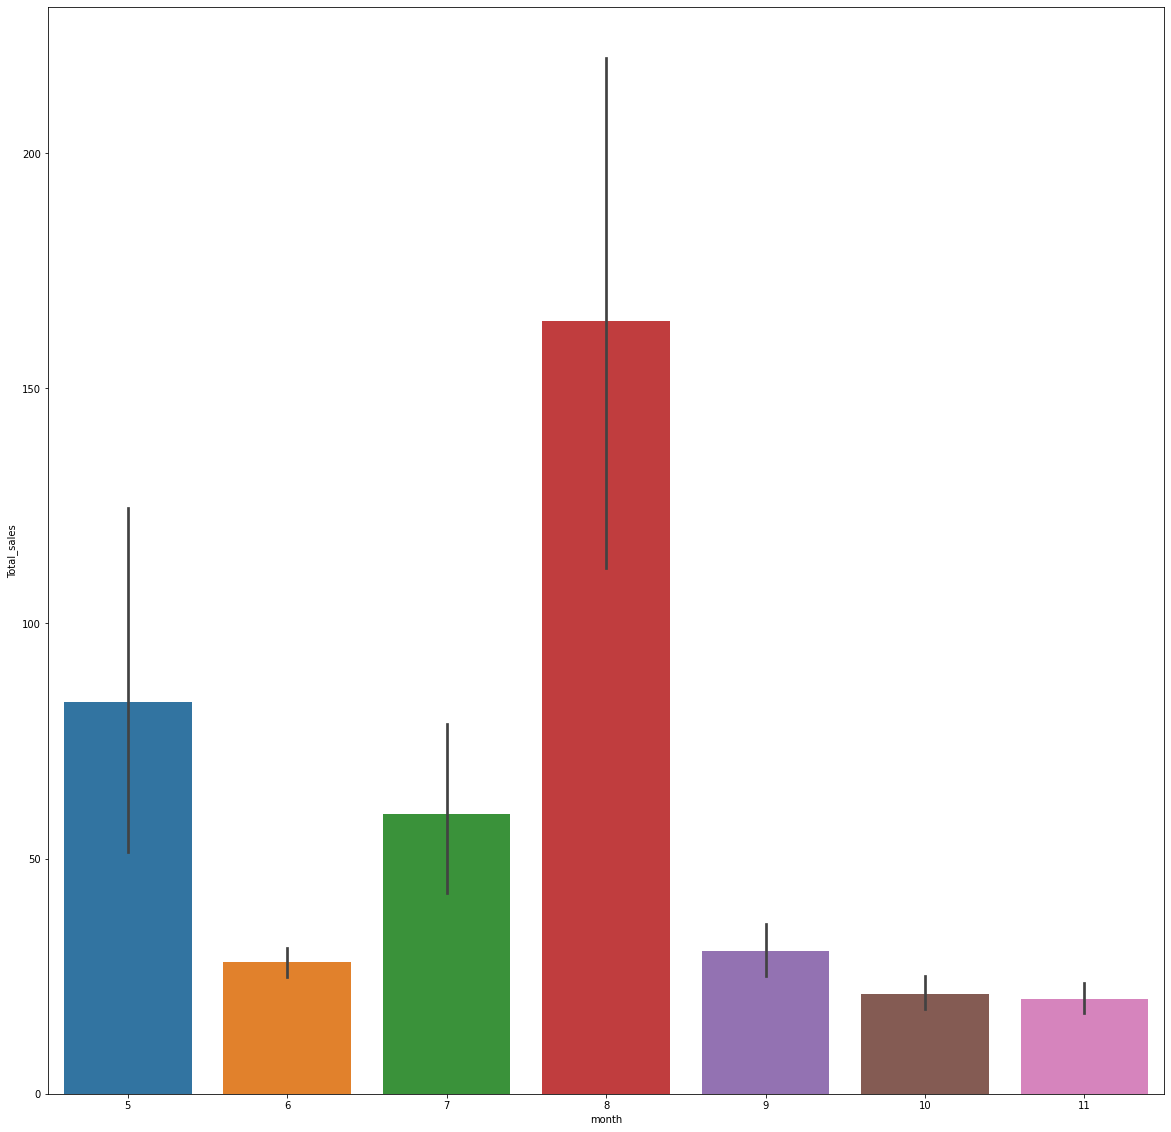

In [138]:
# barplot
sns.barplot(x = 'month', y='Total_sales',data = a)

In [105]:
final_df.to_csv('final_df.csv')

In [28]:
dataframe = final_df

In [29]:
dataframe.set_index("Date",inplace=True)

In [30]:
postive_sentiment_threshold = 0.05
negative_sentiment_thredhold = -0.05
sentiments = []
for sentiment_score in dataframe['polarity']:
  if sentiment_score>= postive_sentiment_threshold:
    sentiments.append("Positive")
  elif sentiment_score <= negative_sentiment_thredhold:
    sentiments.append("Negitive")
  else:
    sentiments.append("Neutral")
dataframe["Sentiment"]= sentiments

In [31]:
dataframe.Sentiment.value_counts()

Positive    181
Neutral      30
Negitive      1
Name: Sentiment, dtype: int64

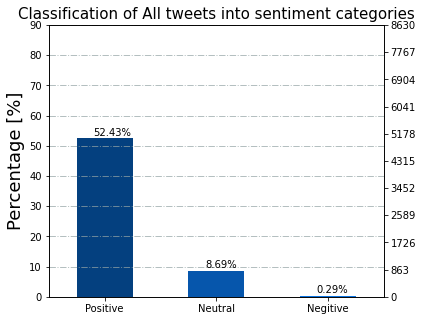

In [45]:
plt.figure(figsize=(6,5))
plt.title('Classification of All tweets into sentiment categories',fontsize=15)
plt.ylabel('Percentage [%]',fontsize=18)
ax = (dataframe.Sentiment.value_counts()/len(df)*2500).plot(kind="bar", rot=0,color=['#04407F','#0656AC','#0A73E1'])
ax.set_yticks(np.arange(0, 100, 10))
plt.grid(color='#95a5a6', linestyle='-.', linewidth=1, axis='y', alpha=0.7)
ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(df)/100)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))


In [46]:
dataframe["Price_diff"]= dataframe["avg_price"].diff()
dataframe.dropna(inplace=True)

In [47]:
import numpy as np
RISE = 1
FALL =0
dataframe["NFT_Trend"] = np.where(
    dataframe["Price_diff"] > 0, RISE , FALL
)

In [48]:
dataframe.head()

,polarity,avg_price,Total_sales,Sentiment,Price_diff,NFT_Trend
Date,,,,,,
2021-05-04,0.132234,4.76,420,Positive,-1.40,0
2021-05-05,0.096869,4.45,278,Positive,-0.31,0
2021-05-06,0.088532,3.24,274,Positive,-1.21,0
2021-05-07,0.140557,6.80,176,Positive,3.56,1
2021-05-08,0.080217,6.60,178,Positive,-0.20,0


In [49]:
new_dataframe=dataframe[["avg_price","Total_sales","Sentiment","NFT_Trend"]]

In [50]:
new_dataframe = pd.get_dummies(new_dataframe,columns=["Sentiment"])
new_dataframe.head()

,avg_price,Total_sales,NFT_Trend,Sentiment_Negitive,Sentiment_Neutral,Sentiment_Positive
Date,,,,,,
2021-05-04,4.76,420,0,0,0,1
2021-05-05,4.45,278,0,0,0,1
2021-05-06,3.24,274,0,0,0,1
2021-05-07,6.80,176,1,0,0,1
2021-05-08,6.60,178,0,0,0,1


In [51]:
x= new_dataframe.copy()
x.drop("NFT_Trend",axis=1,inplace=True)

In [52]:
y = new_dataframe["NFT_Trend"].values.reshape(-1,1)

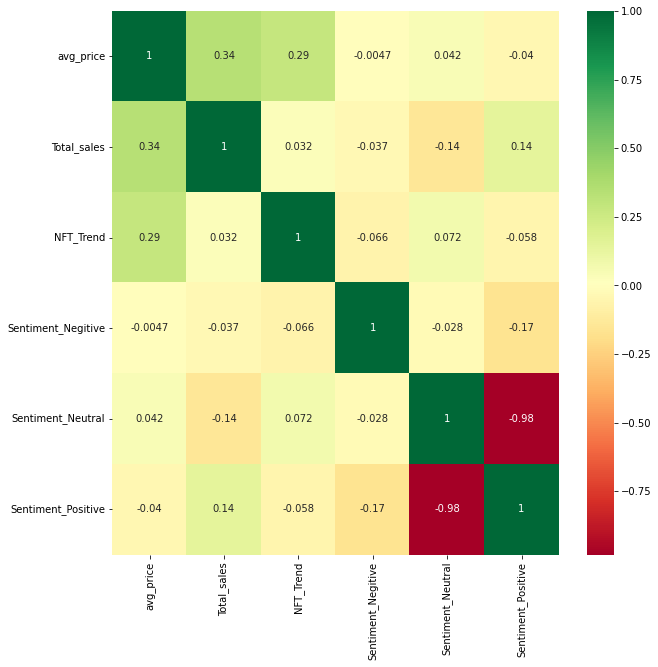

In [64]:
plt.figure(figsize = (10,10))
sns.heatmap(new_dataframe.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [53]:
SPLIT = int(0.6 * len(x))
x_train = x[:SPLIT]
x_test = x[SPLIT:]
y_train = y[:SPLIT]
y_test = y[SPLIT:]

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

x_scaler = scaler.fit(x_train)

x_train_scaled = x_scaler.transform(x_train)

x_test_scaled = x_scaler.transform(x_test)

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
rfc = RandomForestClassifier(max_depth=20000)
rfc.fit(x_train_scaled, y_train)

RandomForestClassifier(max_depth=20000)

In [142]:
y_pred = rfc.predict(x_test_scaled)

In [143]:
y_pred

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [144]:
print('train score:',rfc.score(x_train_scaled,y_train))
print('test score:',rfc.score(x_test_scaled,y_test))

train score: 1.0
test score: 0.49411764705882355


In [147]:
from sklearn.metrics import confusion_matrix
y_pred=rfc.predict(x_test_scaled)
cnf_matrix=confusion_matrix(y_test,y_pred)
cnf_matrix

array([[ 7, 37],
       [ 6, 35]])

Text(69.0, 0.5, 'y_test')

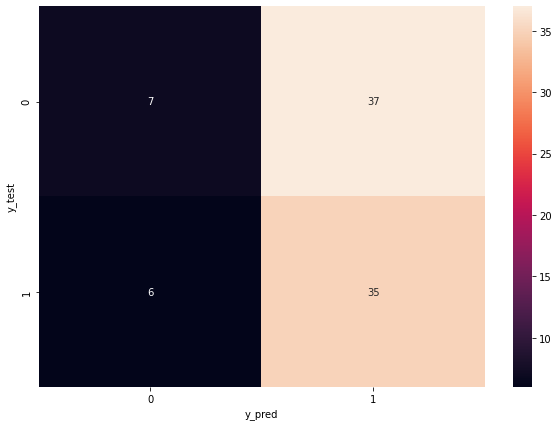

In [146]:
plt.figure(figsize = (10,7))
sns.heatmap(cnf_matrix, annot=True,fmt='g')
plt.xlabel('y_pred')
plt.ylabel('y_test')

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.07      0.12        44
           1       0.49      0.95      0.64        41

    accuracy                           0.49        85
   macro avg       0.54      0.51      0.38        85
weighted avg       0.55      0.49      0.37        85



In [84]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBClassifier

In [85]:
model = [DecisionTreeRegressor,SVR,RandomForestRegressor,KNeighborsRegressor,AdaBoostRegressor,XGBClassifier]

for mod in model:
    reg = mod()
    reg = reg.fit(x_train_scaled,y_train)
    print(mod , 'accuracy',reg.score(x_test_scaled,y_test))

<class 'sklearn.tree._classes.DecisionTreeRegressor'> accuracy -0.8847006651884703
<class 'sklearn.svm._classes.SVR'> accuracy -0.8985410996514
<class 'sklearn.ensemble._forest.RandomForestRegressor'> accuracy -0.3584922394678496
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> accuracy -0.33625277161862566
<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'> accuracy -0.19515999312713328
<class 'xgboost.sklearn.XGBClassifier'> accuracy 0.4823529411764706


In [148]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=150,learning_rate=500, algorithm='SAMME')
clf.fit(x_train_scaled, y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=500, n_estimators=150)

In [149]:
print('train score:',clf.score(x_train_scaled,y_train))
print('test score:',clf.score(x_test_scaled,y_test))

train score: 0.4523809523809524
test score: 0.5176470588235295


In [150]:
y_pred=clf.predict(x_test_scaled)
cnf_matrix=confusion_matrix(y_test,y_pred)
cnf_matrix

array([[44,  0],
       [41,  0]])

Text(69.0, 0.5, 'y_test')

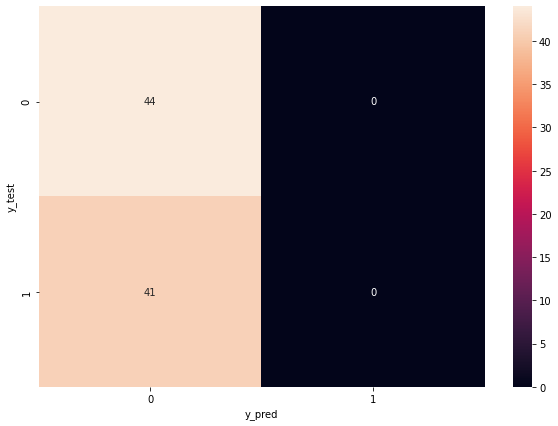

In [151]:
plt.figure(figsize = (10,7))
sns.heatmap(cnf_matrix, annot=True,fmt='g')
plt.xlabel('y_pred')
plt.ylabel('y_test')

In [152]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(loss='exponential',learning_rate=500)
model.fit(x_train_scaled, y_train)

GradientBoostingClassifier(learning_rate=500, loss='exponential')

In [153]:
print('train score:',model.score(x_train_scaled,y_train))
print('test score:',model.score(x_test_scaled,y_test))

train score: 0.5238095238095238
test score: 0.5176470588235295


In [154]:
y_pred=model.predict(x_test_scaled)
cnf_matrix=confusion_matrix(y_test,y_pred)
cnf_matrix

array([[44,  0],
       [41,  0]])

Text(69.0, 0.5, 'y_test')

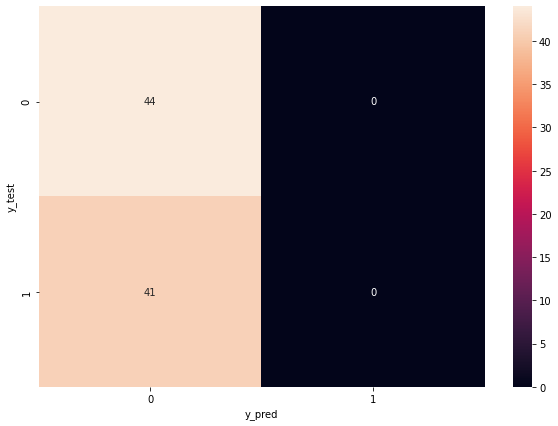

In [155]:
plt.figure(figsize = (10,7))
sns.heatmap(cnf_matrix, annot=True,fmt='g')
plt.xlabel('y_pred')
plt.ylabel('y_test')